In [9]:
theme: minima

NameError: name 'minima' is not defined

In [10]:
import nltk
import geopandas as geopd
import pandas as pd
import os
import fiona 
import shapely
from shapely.geometry import Point
from shapely.wkt import loads
from matplotlib.colors import to_hex
import matplotlib.pyplot as plot
import seaborn 
#to limit geocoding rate in for loops

In [16]:
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\azg526\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [4]:
%pip install requests
import requests

Note: you may need to restart the kernel to use updated packages.


In [15]:
#%pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sa = SentimentIntensityAnalyzer()

In [7]:
#%pip install geograpy3
import geograpy
from geograpy import extraction
from geograpy import places

In [8]:
%pip install geopy
from geopy.geocoders import Nominatim
import time
from pprint import pprint

Note: you may need to restart the kernel to use updated packages.


El Corrido de Gregorio Cortez 
by Diane Lopez
Septemeber 8 2022
text analysis sentiment and gis project

In [17]:
#reading text file
text = open("corrido corpus\gregoriocortez_es_corrido.txt", encoding="utf-8").read()
# Replace line breaks with spaces
text = text.replace('\n', ' ')

for number, sentence in enumerate(nltk.sent_tokenize(text)):
    print(number, sentence)
 # Break text into sentences
sentences = nltk.sent_tokenize(text)

0 En el condado El Carmen miren lo que ha sucedido, murió el Cherife Mayor, quedando Román herido.
1 Se anduvieron informando como media hora después supieropn que el malhechor era Gregorio Cortez.
2 Ya insortaron a Cortez por toditito el estado, que vivo o muerto se aprehenda proque a various ha matado.
3 Decía Gregorio Cortez con su pistola en la mano: No siento haberlo matado, lo que siento es a mi hermano.
4 Decía Gregorio Cortez con su almu my encendid: No siento haberlo matado, la defensa es permitida.
5 Venían los american mas blancos que una amapola, de miedo que le tenían a Cortez con su pistola.
6 Decían los americanos, decían con timidez: Vamos a seguir la huella que el malhechor es Cortez.
7 Soltaron los perros juanes pa'que siguieran la huella, pero alcanzar a Cortez.
8 Tiró con rumbo a Gonzales sin ninguna timidez: Síganme, rinches cobardes, yo soy Gregorio Cortez.
9 Se fue de Belmont al rancho, lo alcanzaron a rodear, poquitos más de trescientos, y allí les brincó el cor

In [18]:
# Make empty list
sentence_scores = []
# Get each sentence and sentence number, which is what enumerate does
for number, sentence in enumerate(sentences):
    # Use VADER to calculate sentiment
    scores = sa.polarity_scores(sentence)
    # Make dictionary and append it to the previously empty list
    sentence_scores.append({'sentence': sentence, 'sentence_number': number+1, 'sentiment_score': scores['compound']})
pd.DataFrame(sentence_scores)
 # Assign DataFrame to variable red_df
 # 10 most negative sentence
greg_df = pd.DataFrame(sentence_scores)
greg_df

,sentence,sentence_number,sentiment_score
0,En el condado El Carmen miren lo que ha sucedi...,1,0.3400
1,Se anduvieron informando como media hora despu...,2,0.0000
2,"Ya insortaron a Cortez por toditito el estado,...",3,0.3400
3,Decía Gregorio Cortez con su pistola en la man...,4,-0.2960
4,Decía Gregorio Cortez con su almu my encendid:...,5,-0.2960
5,Venían los american mas blancos que una amapol...,6,0.0000
6,"Decían los americanos, decían con timidez: Vam...",7,0.0000
7,Soltaron los perros juanes pa'que siguieran la...,8,0.0000
8,Tiró con rumbo a Gonzales sin ninguna timidez:...,9,-0.5574
9,"Se fue de Belmont al rancho, lo alcanzaron a r...",10,0.0000


In [19]:
# Sort by the column "sentiment_score" and slice for first 10 values
# 10 negative sentence_scores
greg_df.sort_values(by='sentiment_score')[:10]

,sentence,sentence_number,sentiment_score
8,Tiró con rumbo a Gonzales sin ninguna timidez:...,9,-0.5574
25,"Decía Gregorio Cortez, decía en su voz divina:...",26,-0.2960
24,"Decía Gregorio Cortez, les gritaba en alta voz...",25,-0.2960
3,Decía Gregorio Cortez con su pistola en la man...,4,-0.2960
4,Decía Gregorio Cortez con su almu my encendid:...,5,-0.2960
23,Decía el Cheride Mayor como queriendo llorar: ...,24,-0.2960
19,Dicen que por culpa mía han matado mucha gente...,20,-0.2960
11,Decía Gregorio Cortez con su pistola en la man...,12,-0.2960
12,"Salió Gregorio Cortez, salió con rumbo a Lared...",13,-0.2960
14,No me pueden agarrar ni con esos perros juanes.,15,-0.2960


In [20]:
# 10 positive sentence_scores
 # Sort by the column "sentiment_score," this time in descending order, and slice for first 10 values

greg_df.sort_values(by='sentiment_score', ascending=False)[:18]
 

,sentence,sentence_number,sentiment_score
0,En el condado El Carmen miren lo que ha sucedi...,1,0.34
2,"Ya insortaron a Cortez por toditito el estado,...",3,0.34
17,Decía Gregorio Cortez echando muchos balazos: ...,18,0.34
13,Decía Gregorio Cortez: Pa' qué se velen de pla...,14,0.00
26,"Ya agarron a Cortez, ya terminó la cuestion, l...",27,0.00
22,Cuando rodearon la case Cortez se les presentó...,23,0.00
21,"Venían todos los rinches, venían que hasta vol...",22,0.00
20,"Cortez le dice a Jesús: Oro sí lo vas a ver, a...",21,0.00
18,"Ya se encontrá a un mexicano, le dice con alti...",19,0.00
16,"Allá por El Encinal, según lo que aquí se dice...",17,0.00


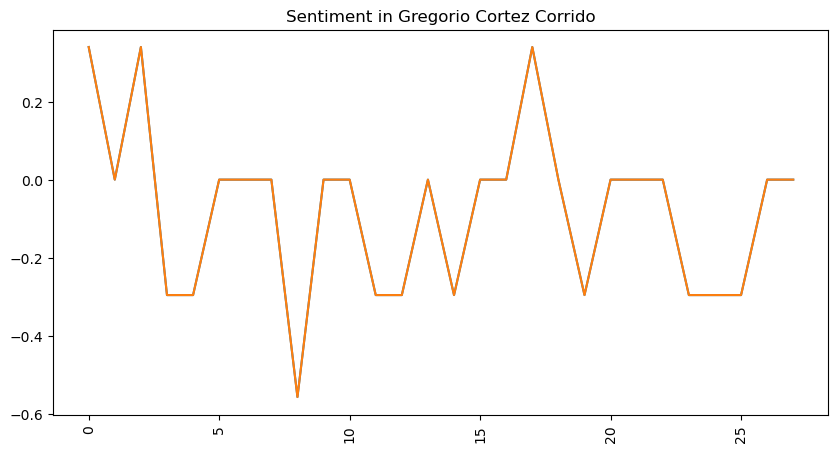

In [21]:
## Make a sentiment plot
greg_df['sentiment_score'].plot();
 
ax = greg_df['sentiment_score'].plot(x='sentence_number', y='sentiment_score', kind='line',
                        figsize=(10,5), rot=90, title='Sentiment in Gregorio Cortez Corrido')

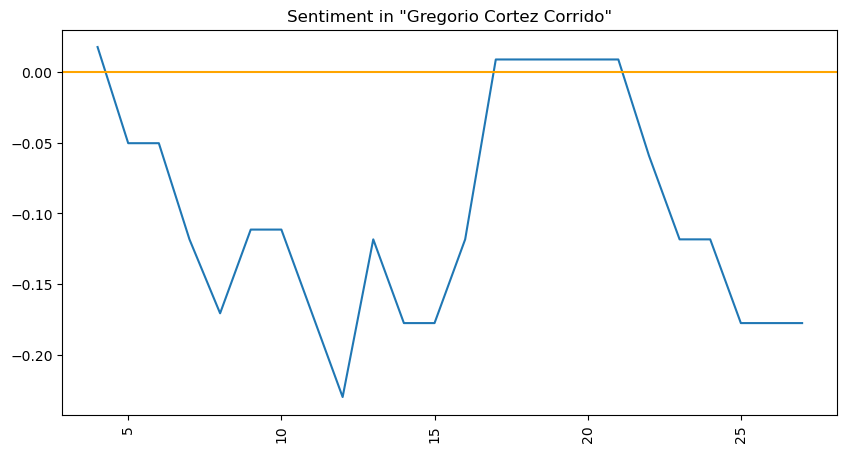

In [22]:
 # Get averages for a rolling window, then plot
greg_df.rolling(5)['sentiment_score'].mean().plot(x='sentence_number', y='sentiment_score', kind='line',
                        figsize=(10,5), rot=90, title='Sentiment in "Gregorio Cortez Corrido"')

# Plot a horizontal line at 0
plot.axhline(y=0, color='orange', linestyle='-');

Word Frequencies: ask Hejin for help here

In [ ]:
path_corridos = os.getcwd()
greg_file = 'gregoriocortez_es_corrido.txt'
corpus = PlaintextCorpusReader( path_corridos, greg_file)
corpus

In [ ]:
stop_words = []
# The filename of the custom data/stop_words.csv file
stopwords_greg = 'corrido corpus\gregoriocortez_es_corrido.txt'
if os.path.exists(stopwords_greg):
    #import csv
    with open(stopwords_greg, 'r', encoding="utf-8") as f:
        stop_words = list(f)[0:27]
    print('Custom stopwords list loaded from doc')
else:
    # Load the NLTK stopwords list
    from nltk.corpus import stopwords
    stop_words = stopwords.words('spanish')
    print('NLTK stopwords list loaded')

pprint(stop_words)

STOP WORDS!!!

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\azg526\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords


c:\Users\azg526\Anaconda3\envs\GregCortez\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import nltk
from nltk.corpus import stopwords

stops = set(stopwords.words('spanish'))
print(stops)

{'o', 'la', 'tengas', 'habías', 'me', 'su', 'estados', 'os', 'hubieron', 'eres', 'ya', 'tengáis', 'es', 'hubieran', 'como', 'por', 'sin', 'hubiésemos', 'tienes', 'suyos', 'tuvieron', 'sea', 'seremos', 'sean', 'mi', 'tuvieras', 'había', 'teníamos', 'suyo', 'tendrá', 'tendrían', 'fuimos', 'habrás', 'tengan', 'tendríamos', 'esos', 'habíais', 'tuviésemos', 'esa', 'durante', 'tuviesen', 'hubieseis', 'fuese', 'eso', 'muy', 'ni', 'algo', 'estarán', 'tuviste', 'estará', 'nosotros', 'otros', 'estéis', 'estabais', 'eran', 'de', 'algunas', 'estuviste', 'al', 'estada', 'tenías', 'estáis', 'hubiste', 'este', 'hayáis', 'será', 'habidos', 'somos', 'tuyo', 'habían', 'fueron', 'sentidas', 'vuestra', 'estaríamos', 'esta', 'un', 'estuvo', 'están', 'han', 'hayas', 'vuestros', 'cuando', 'estuvieran', 'teníais', 'estamos', 'estuve', 'soy', 'les', 'vuestras', 'son', 'tendremos', 'habéis', 'sí', 'uno', 'estemos', 'estuvisteis', 'tendré', 'tú', 'suya', 'algunos', 'tuve', 'los', 'suyas', 'fueras', 'habidas', 'a

In [5]:
greg = open("corrido corpus\gregoriocortez_es_corrido.txt", encoding = 'utf-8').read().lower()

In [6]:
#the var stopWords contains ## stop words
stopWords = set(stopwords.words('spanish'))
words = word_tokenize(greg)
wordsFiltered = []

for w in words:
    if w not in stopWords:
        #wordsFiltered contains all words which are not stop words. 
        wordsFiltered.append(w)

print(wordsFiltered)

['condado', 'carmen', 'miren', 'sucedido', ',', 'murió', 'cherife', 'mayor', ',', 'quedando', 'román', 'herido', '.', 'anduvieron', 'informando', 'media', 'hora', 'después', 'supieropn', 'malhechor', 'gregorio', 'cortez', '.', 'insortaron', 'cortez', 'toditito', ',', 'vivo', 'muerto', 'aprehenda', 'proque', 'various', 'matado', '.', 'decía', 'gregorio', 'cortez', 'pistola', 'mano', ':', 'siento', 'haberlo', 'matado', ',', 'siento', 'hermano', '.', 'decía', 'gregorio', 'cortez', 'almu', 'my', 'encendid', ':', 'siento', 'haberlo', 'matado', ',', 'defensa', 'permitida', '.', 'venían', 'american', 'mas', 'blancos', 'amapola', ',', 'miedo', 'cortez', 'pistola', '.', 'decían', 'americanos', ',', 'decían', 'timidez', ':', 'vamos', 'seguir', 'huella', 'malhechor', 'cortez', '.', 'soltaron', 'perros', 'juanes', "pa'que", 'siguieran', 'huella', ',', 'alcanzar', 'cortez', '.', 'tiró', 'rumbo', 'gonzales', 'ninguna', 'timidez', ':', 'síganme', ',', 'rinches', 'cobardes', ',', 'gregorio', 'cortez',

In [7]:
print(len(stopWords))
print(stopWords)

313
{'o', 'la', 'tengas', 'habías', 'me', 'su', 'estados', 'os', 'hubieron', 'eres', 'ya', 'tengáis', 'es', 'hubieran', 'como', 'por', 'sin', 'hubiésemos', 'tienes', 'suyos', 'tuvieron', 'sea', 'seremos', 'sean', 'mi', 'tuvieras', 'había', 'teníamos', 'suyo', 'tendrá', 'tendrían', 'fuimos', 'habrás', 'tengan', 'tendríamos', 'esos', 'habíais', 'tuviésemos', 'esa', 'durante', 'tuviesen', 'hubieseis', 'fuese', 'eso', 'muy', 'ni', 'algo', 'estarán', 'tuviste', 'estará', 'nosotros', 'otros', 'estéis', 'estabais', 'eran', 'de', 'algunas', 'estuviste', 'al', 'estada', 'tenías', 'estáis', 'hubiste', 'este', 'hayáis', 'será', 'habidos', 'somos', 'tuyo', 'habían', 'fueron', 'sentidas', 'vuestra', 'estaríamos', 'esta', 'un', 'estuvo', 'están', 'han', 'hayas', 'vuestros', 'cuando', 'estuvieran', 'teníais', 'estamos', 'estuve', 'soy', 'les', 'vuestras', 'son', 'tendremos', 'habéis', 'sí', 'uno', 'estemos', 'estuvisteis', 'tendré', 'tú', 'suya', 'algunos', 'tuve', 'los', 'suyas', 'fueras', 'habidas'

In [8]:
word_tokenize(greg)

['en',
 'el',
 'condado',
 'el',
 'carmen',
 'miren',
 'lo',
 'que',
 'ha',
 'sucedido',
 ',',
 'murió',
 'el',
 'cherife',
 'mayor',
 ',',
 'quedando',
 'román',
 'herido',
 '.',
 'se',
 'anduvieron',
 'informando',
 'como',
 'media',
 'hora',
 'después',
 'supieropn',
 'que',
 'el',
 'malhechor',
 'era',
 'gregorio',
 'cortez',
 '.',
 'ya',
 'insortaron',
 'a',
 'cortez',
 'por',
 'toditito',
 'el',
 'estado',
 ',',
 'que',
 'vivo',
 'o',
 'muerto',
 'se',
 'aprehenda',
 'proque',
 'a',
 'various',
 'ha',
 'matado',
 '.',
 'decía',
 'gregorio',
 'cortez',
 'con',
 'su',
 'pistola',
 'en',
 'la',
 'mano',
 ':',
 'no',
 'siento',
 'haberlo',
 'matado',
 ',',
 'lo',
 'que',
 'siento',
 'es',
 'a',
 'mi',
 'hermano',
 '.',
 'decía',
 'gregorio',
 'cortez',
 'con',
 'su',
 'almu',
 'my',
 'encendid',
 ':',
 'no',
 'siento',
 'haberlo',
 'matado',
 ',',
 'la',
 'defensa',
 'es',
 'permitida',
 '.',
 'venían',
 'los',
 'american',
 'mas',
 'blancos',
 'que',
 'una',
 'amapola',
 ',',
 'de',